<a href="https://colab.research.google.com/github/Gondram/Prediction-of-Product-Sales/blob/main/Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Product Sales
- David Atkins

## Project Overview

## Load and Inspect Data

In [1]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###"Loading Data"
- Use Pandas to read the sales prediction data set into Google Colab.
- Use df.info() and df.head() methods to preview the first rows of your data and a summary of your DataFrame's columns.

In [2]:
import seaborn as sns
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',100)
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter, MultipleLocator
import missingno
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
# Setting pandas as the default output for sklearn
from sklearn import set_config
set_config(transform_output='pandas')

fpath = "/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv"
df = pd.read_csv(fpath)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [3]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Clean Data

###How many rows and columns?

- `8523 rows and 12 columns`

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


###What are the datatypes of each variable?

In [5]:
# Initial comparison to the Data Dictionary did not show any obviously mismatched data types
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

###Are there duplicates? If so, drop any duplicates.

In [6]:
# There are no duplicates in the provided dataset
df.duplicated().sum()

0

###Identify missing values

In [7]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
df.isna().sum()/len(df)*100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [9]:
df['Outlet_Size'].value_counts(dropna=False)

Medium    2793
NaN       2410
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [10]:
df['Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

###Address the missing values by using a placeholder value.

`I used 'MISSING' for Outlet Size and -1 for Item Weight`

In [11]:
df['Outlet_Size'] = df['Outlet_Size'].fillna('MISSING')
df['Outlet_Size'].value_counts(dropna=False)

Medium     2793
MISSING    2410
Small      2388
High        932
Name: Outlet_Size, dtype: int64

In [12]:
df['Item_Weight'] = df['Item_Weight'].fillna(-1)
df['Item_Weight'].describe()

count    8523.000000
mean       10.478936
std         6.720742
min        -1.000000
25%         6.650000
50%        11.000000
75%        16.000000
max        21.350000
Name: Item_Weight, dtype: float64

###Confirm that there are no missing values after addressing them.



In [13]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

###Find and fix any inconsistent categories of data

In [14]:
df.nunique() / len(df) * 100

Item_Identifier              18.291681
Item_Weight                   4.880910
Item_Fat_Content              0.058665
Item_Visibility              92.455708
Item_Type                     0.187727
Item_MRP                     69.670304
Outlet_Identifier             0.117330
Outlet_Establishment_Year     0.105597
Outlet_Size                   0.046932
Outlet_Location_Type          0.035199
Outlet_Type                   0.046932
Item_Outlet_Sales            40.983222
dtype: float64

In [15]:
obj_cols = df.select_dtypes('object').columns
df[obj_cols].nunique() / len(df) * 100

Item_Identifier         18.291681
Item_Fat_Content         0.058665
Item_Type                0.187727
Outlet_Identifier        0.117330
Outlet_Size              0.046932
Outlet_Location_Type     0.035199
Outlet_Type              0.046932
dtype: float64

In [16]:
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [17]:
df['Outlet_Size'].value_counts()

Medium     2793
MISSING    2410
Small      2388
High        932
Name: Outlet_Size, dtype: int64

In [18]:
df['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [19]:
df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [20]:
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [21]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [22]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace("LF","Low Fat")
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace("low fat","Low Fat")
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace("reg","Regular")
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

###For any numerical columns, obtain the summary statistics of each (min, max, mean).



In [23]:
num_cols = df.select_dtypes('number').columns
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [24]:
df_min = df[num_cols].min()
df_min

Item_Weight                    -1.00
Item_Visibility                 0.00
Item_MRP                       31.29
Outlet_Establishment_Year    1985.00
Item_Outlet_Sales              33.29
dtype: float64

In [25]:
df_max = df[num_cols].max()
df_max

Item_Weight                     21.350000
Item_Visibility                  0.328391
Item_MRP                       266.888400
Outlet_Establishment_Year     2009.000000
Item_Outlet_Sales            13086.964800
dtype: float64

In [26]:
df_mean = df[num_cols].mean()
df_mean

Item_Weight                    10.478936
Item_Visibility                 0.066132
Item_MRP                      140.992782
Outlet_Establishment_Year    1997.831867
Item_Outlet_Sales            2181.288914
dtype: float64

## Exploratory Data Analysis


In [27]:
# Re-Checking Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [28]:
# Creating numerical variable
num_cols = df.select_dtypes('number').columns
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

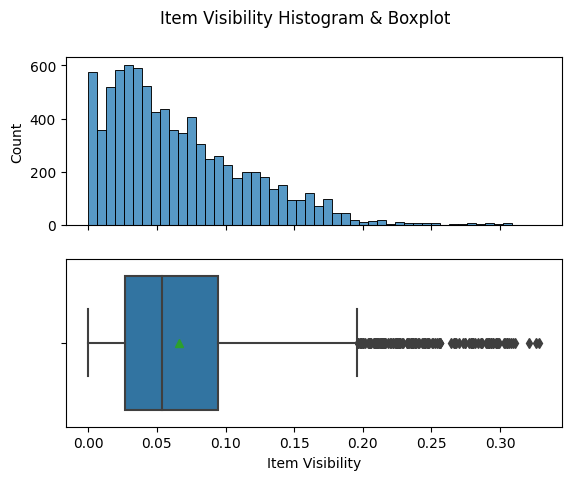

In [29]:
# Building a function so I can use a for loop to generate charts

def numeric_chart(data,col):
# Displaying both a histogram and a boxplot in the same fig
  fig, (ax1, ax2) = plt.subplots(2, sharex=True)
  col_name = col.replace("_"," ")    # This is to clean up the labels
  fig.suptitle(f'{col_name} Histogram & Boxplot')
  sns.histplot(data = df, x = col, ax = ax1)
  sns.boxplot(data = df, x = col, showmeans=True, ax = ax2)
  ax2.set(xlabel=col_name)

numeric_chart(df,"Item_Visibility") #Testing

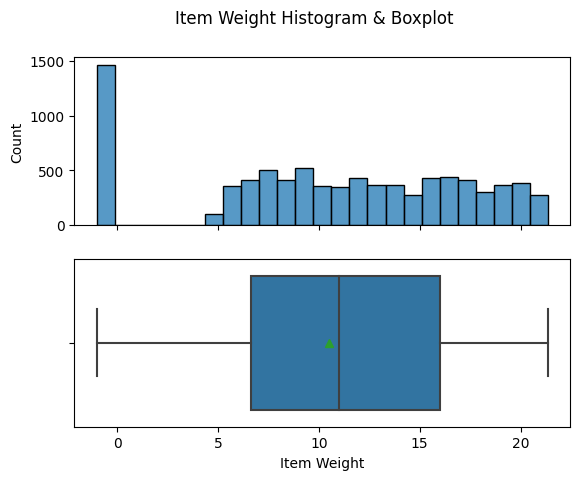

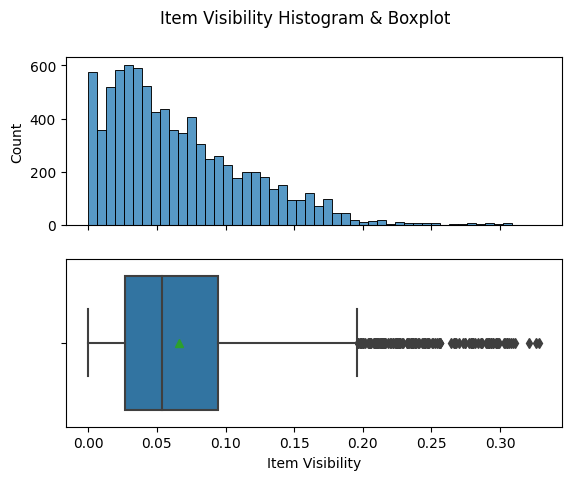

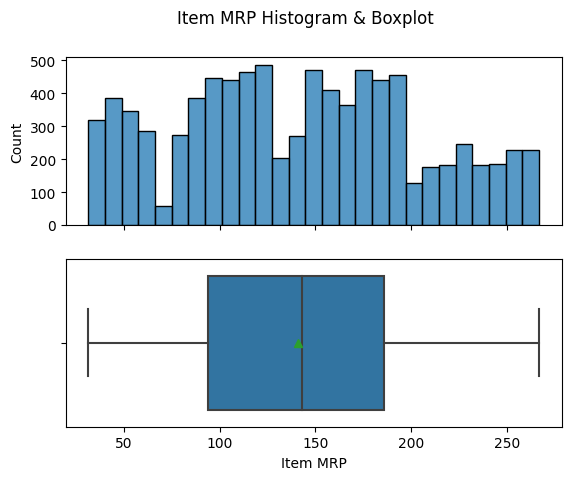

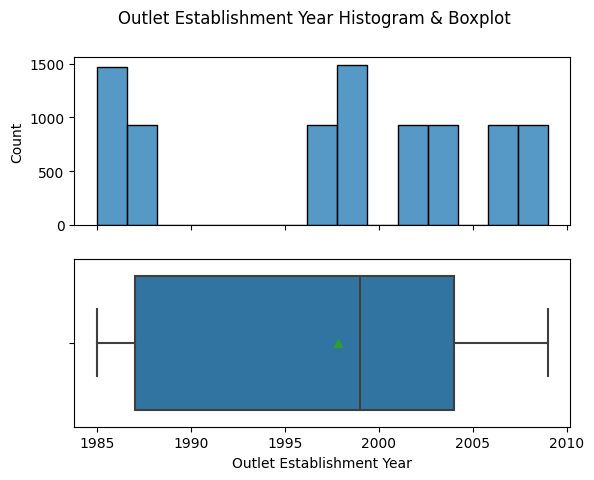

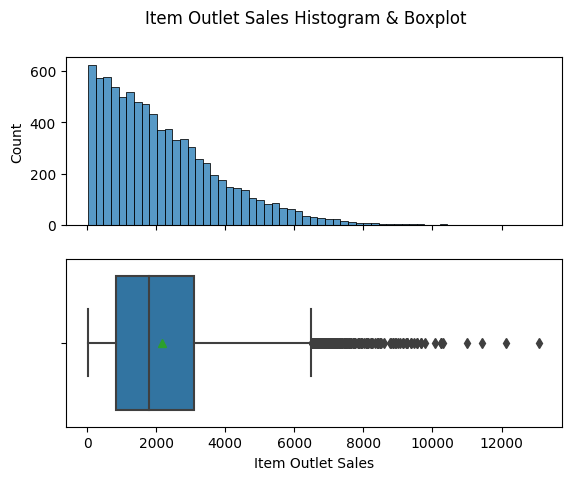

In [30]:
# Now we display the numerical data
for column in num_cols:
  print("\n")
  numeric_chart(df,column)
  plt.show()

In [31]:
# Time to get into some categorical data!
cat_cols = df.select_dtypes('object').columns
cat_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

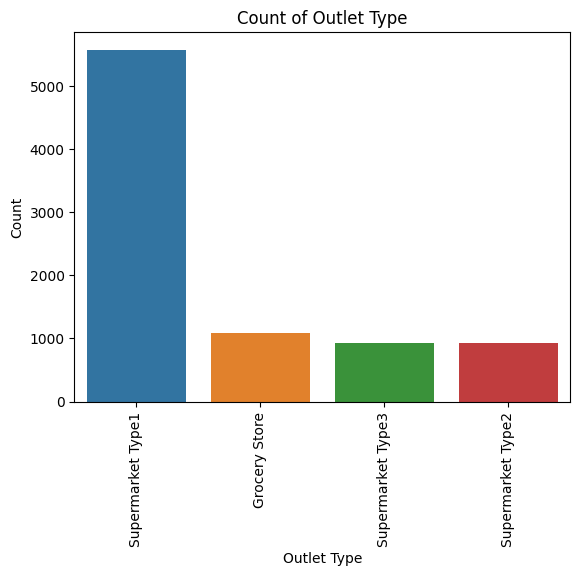

In [32]:
# Same drill as last time, I will make a function to use in a for loop
def count_plot(data,col):
  ord = df[col].value_counts().index
  col_name = col.replace("_"," ")
  g = sns.countplot(data=data, x=col, order=ord)
  g.set(title=f'Count of {col_name}', xlabel=col_name, ylabel="Count");
  plt.xticks(rotation=90, ha='center')


count_plot(df,'Outlet_Type')


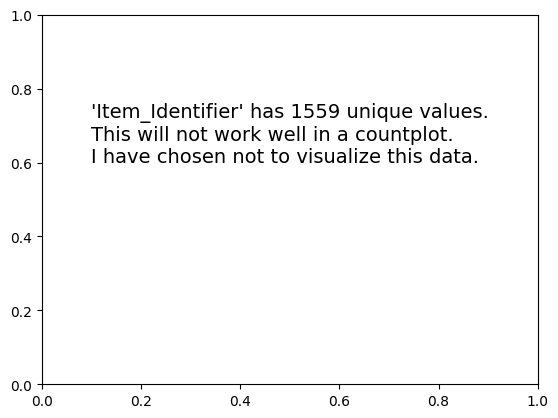

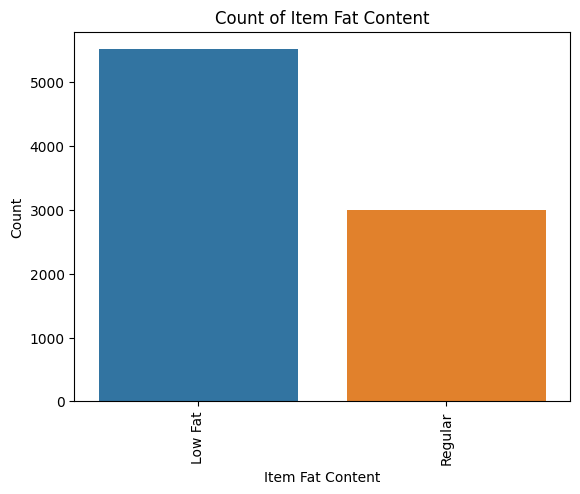

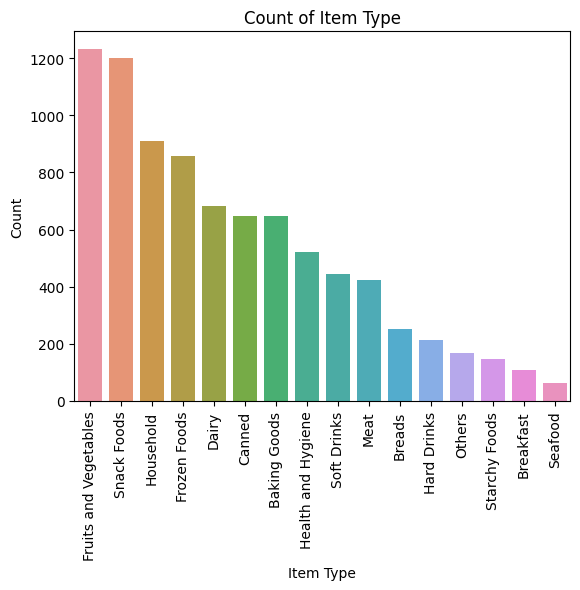

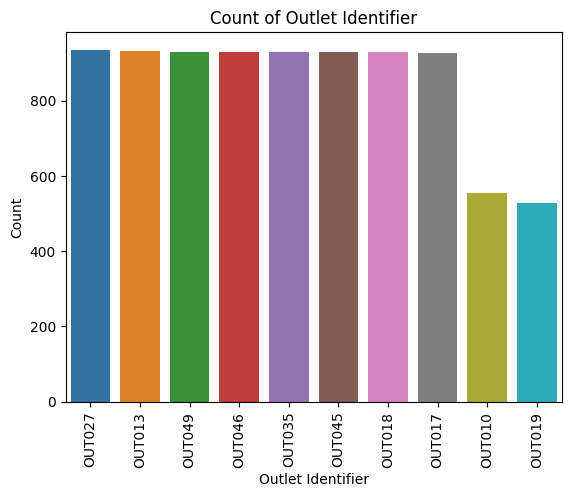

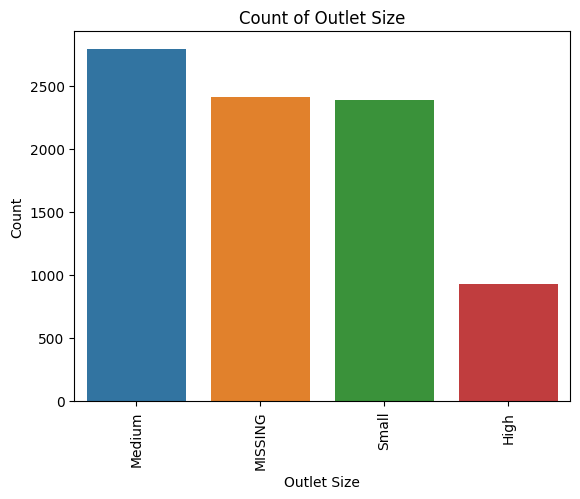

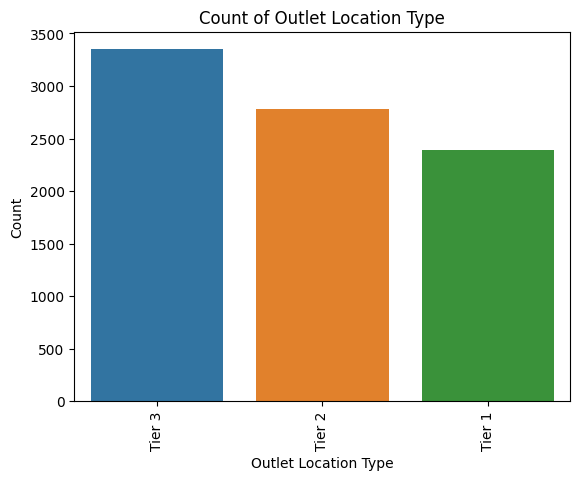

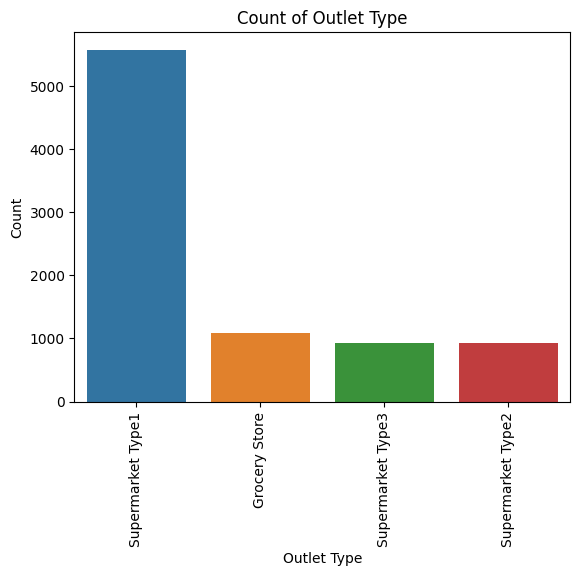

In [33]:
# And now I make the for loop to make the countplots
# I included an if statement to catch and handle any column that will not work with a countplot
for column in cat_cols:
  print("\n")
  uq_count = int(df[column].nunique())
  column_name = column.replace("_"," ")
  if uq_count > 20:
    ax = sns.lineplot()
    ax.text(0.1, 0.6, f"'{column}' has {uq_count} unique values. \nThis will not work well in a countplot.\nI have chosen not to visualize this data.", fontsize = 14)

  else:
    count_plot(df,column)

  plt.show()

In [34]:
# And now for the heatmap - starting with finding the corrolations
corr = df.corr(numeric_only=True)
corr.round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.00,-0.08,0.02,0.54,-0.06
Item_Visibility,-0.08,1.00,-0.00,-0.07,-0.13
Item_MRP,0.02,-0.00,1.00,0.01,0.57
Outlet_Establishment_Year,0.54,-0.07,0.01,1.00,-0.05
Item_Outlet_Sales,-0.06,-0.13,0.57,-0.05,1.00


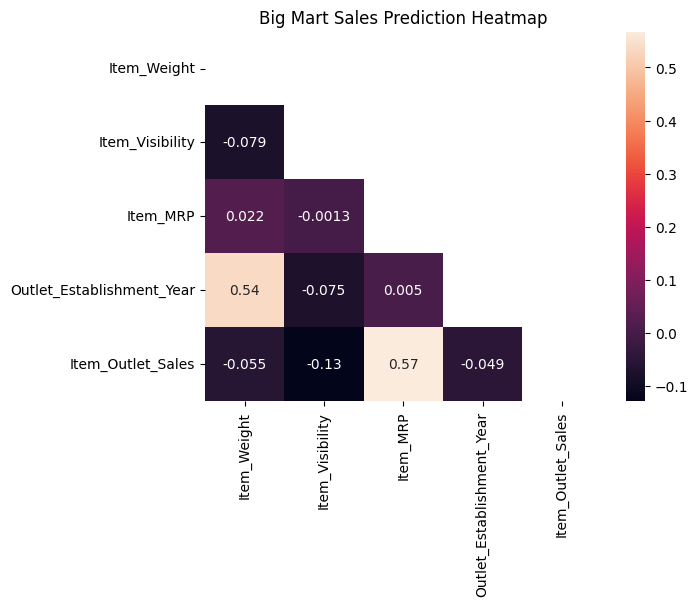

In [35]:
mask = np.triu(np.ones_like(corr))
sns.heatmap(corr, annot=True, mask=mask).set(title='Big Mart Sales Prediction Heatmap');

## Feature Inspection

####Removing placeholders and replacing them with null values.

In [36]:
# Re-checking the columns with placeholders
filter_neg_Item_Weight = df['Item_Weight'] < 0
filter_neg_Item_Weight.sum()

1463

In [37]:
filter_missing_Outlet_Size = df['Outlet_Size'] == 'MISSING'
filter_missing_Outlet_Size.sum()

2410

In [38]:
# Fixing Item Weight
df.loc[filter_neg_Item_Weight,'Item_Weight'] = np.nan
filter_neg_Item_Weight = df['Item_Weight'] < 0
filter_neg_Item_Weight.sum()

0

In [39]:
# Fixing Outlet Size
df.loc[filter_missing_Outlet_Size,'Outlet_Size'] = np.nan
filter_missing_Outlet_Size = df['Outlet_Size'] == 'MISSING'
filter_missing_Outlet_Size.sum()

0

####Now I am creating the functions I need to inspect the features

In [40]:
# First I am creating variables that represent each feature type
num_cols = df.select_dtypes('number').columns
cat_cols = df.select_dtypes('object').columns
card_cols = ['Outlet_Size','Outlet_Location_Type']  # Cardinal
print(f'num_cols {num_cols}')
print(f'cat_cols {cat_cols}')
print(f'card_cols {card_cols}')

num_cols Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')
cat_cols Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')
card_cols ['Outlet_Size', 'Outlet_Location_Type']


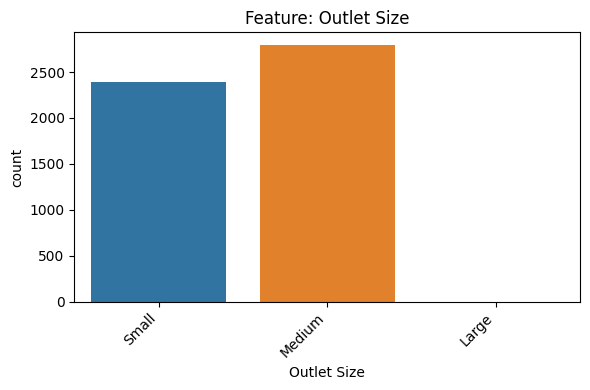

In [41]:
# Univariate visualization showing the distribution of values/categories
def eda_cat(df, x, fillna=True, placeholder = 'MISSING', order=None):
  temp_df = df.copy()

  if fillna == True:
      temp_df[x] = temp_df[x].fillna(placeholder)
  col_name = x.replace("_"," ")
  fig, ax = plt.subplots(figsize=(6,4))
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  ax.set(title=f"Feature: {col_name}", xlabel=col_name)
  fig.tight_layout()

# Testing
Size_Order = ['Small','Medium','Large']
eda_cat(df, 'Outlet_Size', fillna=True, order=Size_Order)


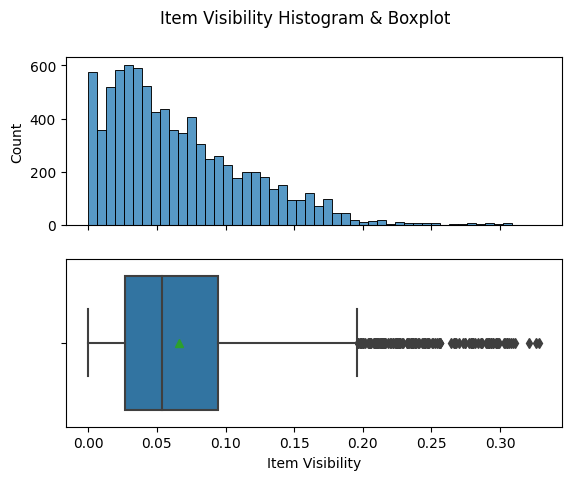

In [42]:
# numerical eda

def eda_num(df,x):
# Displaying both a histogram and a boxplot in the same fig
  fig, (ax1, ax2) = plt.subplots(2, sharex=True)
  x_name = x.replace("_"," ")    # This is to clean up the labels
  fig.suptitle(f'{x_name} Histogram & Boxplot')
  sns.histplot(data = df, x = x, ax = ax1)
  sns.boxplot(data = df, x = x, showmeans=True, ax = ax2)
  ax2.set(xlabel=x_name)

numeric_chart(df,"Item_Visibility") #Testing

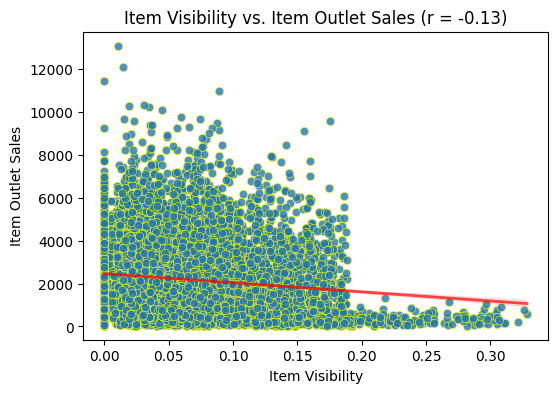

In [43]:
def num_v_target(df, x, y='Item_Outlet_Sales', figsize=(6,4)):
  corr = df[[x,y]].corr().round(2)
  r = corr.loc[x,y]
  x_name = x.replace("_"," ")
  y_name = y.replace("_"," ")
  fig, ax = plt.subplots(figsize=figsize)
  scatter_kws={'ec':'yellow','lw':0.5,'alpha':0.8}
  line_kws={"color":"red","alpha":0.7,"lw":2}
  sns.regplot(data=df, x=x, y=y, ax=ax, scatter_kws=scatter_kws, line_kws=line_kws)
  ax.set(title=f"{x_name} vs. {y_name} (r = {r})", xlabel=x_name, ylabel=y_name)
  plt.show()
  return fig, ax

fig, ax = num_v_target(df, "Item_Visibility")

In [44]:
# generating the text for a markdown cell
def mk_txt(df, x, know_before=False):
  num_cols = df.select_dtypes('number').columns
  cat_cols = df.select_dtypes('object').columns
  card_cols = ['Outlet_Size','Outlet_Location_Type']
  null_ct = df[x].isna().sum()
  null_p = df[x].isna().sum()/len(df)*100
  val_counts = df[x].value_counts(dropna=False)
  qc = val_counts.values[0] / len(df) * 100
  card = df[x].nunique(dropna=False)

  if x in card_cols:
    ftype = 'ordinal'
  elif x in num_cols:
    ftype = 'numeric'
  else:
    ftype = 'categorical (nominal)'

  print(f'- This feature type is {ftype}.')

  if qc > 99:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
    drop = True
  else:
    print("- This feature is not constant or quasi-constant.")
    drop = False

  print(f'- There are {null_ct} null values, totalling {round(null_p,2)}% of the feature.')

  if null_ct == 0:
    print('- With zero null values there is need to impute.')
  else:
    if drop == True:
      print('- We are dropping this column, which will handle the null values.')
    else:
      if x in card_cols:
        print('- This is ordinal data, we will ignore the null rows')
      elif x in num_cols:
        print('- To handle nulls we will impute the value, likely with the mean or median.')
      else:
        print("- To handle nulls we will impute the value with 'MISSING'")

  if card > 10:
    print(f'- The cardinality is {card}. This is high.')
  else:
    print(f'- The cardinality is {card}. This not high.')

  if know_before == True:
    print("- We would know this feature before the target was determined.")
  else:
    print("- We would not know this feature before the target was determined.")
  print('**is there a reason to exclude?**')

mk_txt(df, 'Item_Visibility', know_before=True)

- This feature type is numeric.
- This feature is not constant or quasi-constant.
- There are 0 null values, totalling 0.0% of the feature.
- With zero null values there is need to impute.
- The cardinality is 7880. This is high.
- We would know this feature before the target was determined.
**is there a reason to exclude?**


In [45]:
def cat_v_target(df, x, y='Item_Outlet_Sales', figsize=(6,4), fillna = True, placeholder = 'MISSING', order = None):
  temp_df = df.copy()

  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  else:
    temp_df = temp_df.dropna(subset=[x])

  x_name = x.replace("_"," ")
  y_name = y.replace("_"," ")
  fig, ax = plt.subplots(figsize=figsize)
  sns.barplot(data=temp_df, x=x, y=y, ax=ax, alpha=0.6, linewidth=1, edgecolor='black', errorbar=None, hue_order=order, order=order)
  sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax, hue_order=order, order=order, legend=False,edgecolor='white', linewidth=0.5,size=3,zorder=0)
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  ax.set(xlabel=x_name, ylabel=y_name)
  ax.set_title(f"{x_name} vs. {y_name}")
  fig.tight_layout()
  return fig, ax

In [46]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

## Feature Inspection

###Item_Identifier
Description: *Product ID*

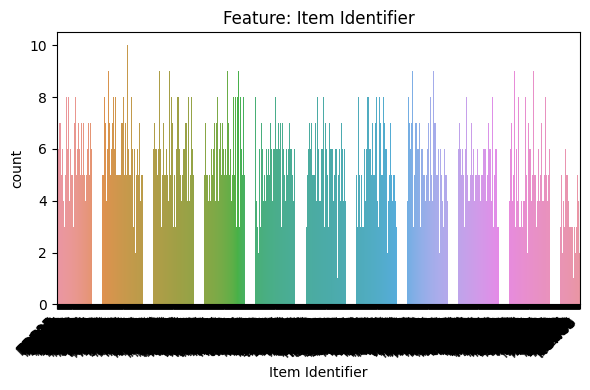

In [47]:
eda_cat(df, 'Item_Identifier', fillna=False)

In [48]:
mk_txt(df, 'Item_Identifier', know_before=False)

- This feature type is categorical (nominal).
- This feature is not constant or quasi-constant.
- There are 0 null values, totalling 0.0% of the feature.
- With zero null values there is need to impute.
- The cardinality is 1559. This is high.
- We would not know this feature before the target was determined.
**is there a reason to exclude?**


- This feature type is categorical (nominal).
- This feature is not constant or quasi-constant.
- There are 0 null values, totalling 0.0% of the feature.
- With zero null values there is need to impute.
- The cardinality is 1559. This is high.
- We would not know this feature before the target was determined.
- I may exclude to to extremely hight cardinality

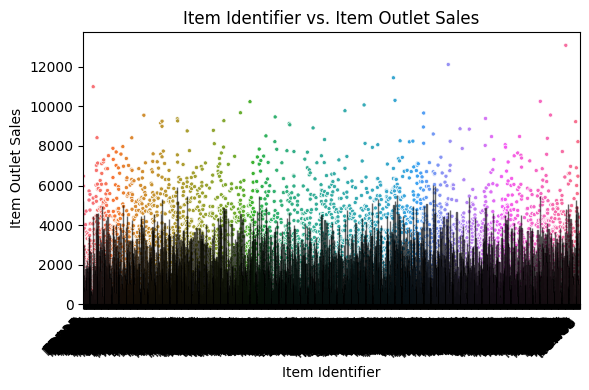

In [49]:
fig, ax = cat_v_target(df, 'Item_Identifier')

- Based on my business understanding I expected there might be a low corrolation
- Based on the data this feature does not appear to be a predictor of the target

###Item_Weight
Description: *Weight of product*

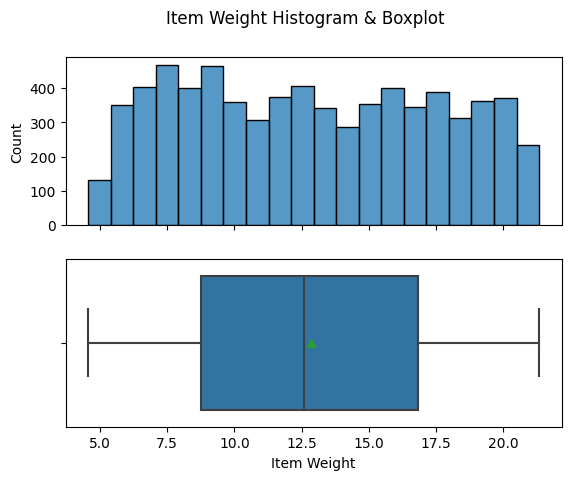

In [50]:
eda_num(df,'Item_Weight')

In [51]:
mk_txt(df, 'Item_Weight', know_before=True)

- This feature type is numeric.
- This feature is not constant or quasi-constant.
- There are 1463 null values, totalling 17.17% of the feature.
- To handle nulls we will impute the value, likely with the mean or median.
- The cardinality is 416. This is high.
- We would know this feature before the target was determined.
**is there a reason to exclude?**


- This feature type is numeric.
- This feature is not constant or quasi-constant.
- There are 1463 null values, totalling 17.17% of the feature.
- To handle nulls we will impute the value, likely with the mean or median.
- The cardinality is 416. This is high.
- We would know this feature before the target was determined.
- I do not know of any business reason to exclude this feature

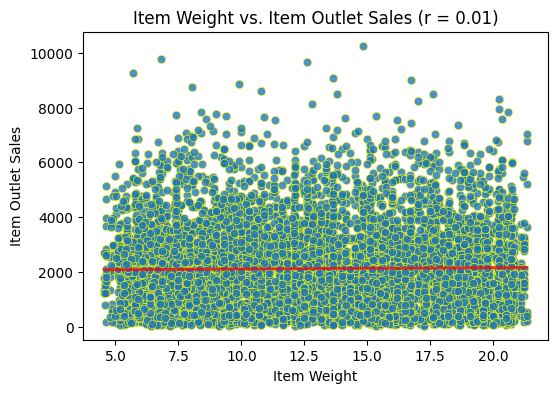

(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Item Weight vs. Item Outlet Sales (r = 0.01)'}, xlabel='Item Weight', ylabel='Item Outlet Sales'>)

In [52]:
num_v_target(df, 'Item_Weight', y='Item_Outlet_Sales', figsize=(6,4))

- Based on my business understanding I did not expect this feature to be a predictor
- Based on the data this feature does not appear to be a predictor of the target

###Item_Fat_Content
Description: *Whether the product is low-fat or regular*

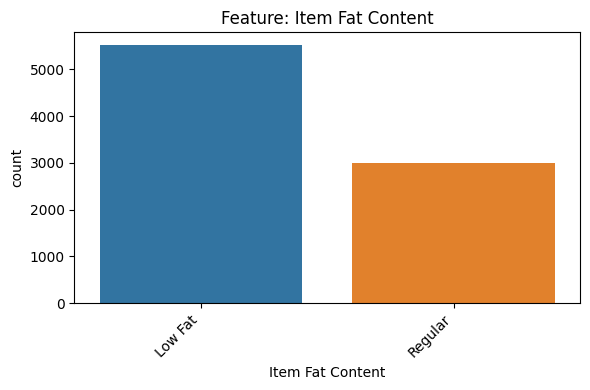

In [53]:
eda_cat(df, 'Item_Fat_Content')

In [54]:
mk_txt(df, 'Item_Fat_Content', know_before=True)

- This feature type is categorical (nominal).
- This feature is not constant or quasi-constant.
- There are 0 null values, totalling 0.0% of the feature.
- With zero null values there is need to impute.
- The cardinality is 2. This not high.
- We would know this feature before the target was determined.
**is there a reason to exclude?**


- This feature type is categorical (nominal).
- This feature is not constant or quasi-constant.
- There are 0 null values, totalling 0.0% of the feature.
- With zero null values there is need to impute.
- The cardinality is 2. This not high.
- We would know this feature before the target was determined.
- There is no reason to exclude this feature

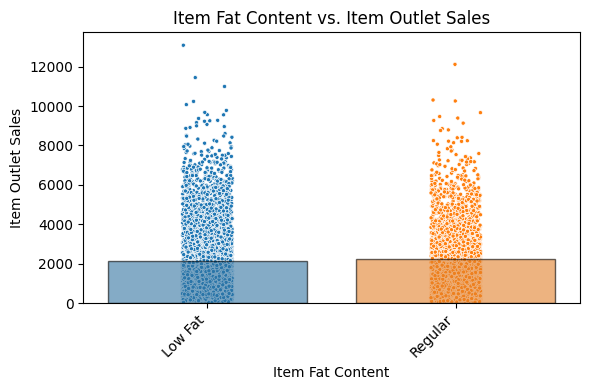

In [55]:
fig, ax = cat_v_target(df, 'Item_Fat_Content')

- I did not expect this to be a predictor
- Based on the data this feature does not appear to be a predictor of the target

###Item_Visibility
Description: *The percentage of total display area of all products in a store allocated to the particular product*

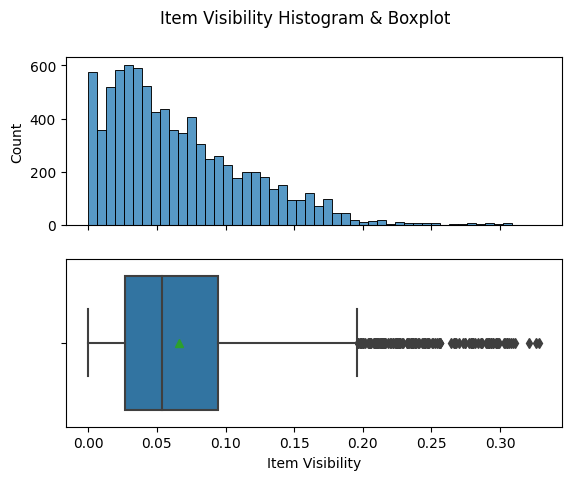

In [56]:
eda_num(df, 'Item_Visibility')

In [57]:
mk_txt(df, 'Item_Visibility', know_before=True)

- This feature type is numeric.
- This feature is not constant or quasi-constant.
- There are 0 null values, totalling 0.0% of the feature.
- With zero null values there is need to impute.
- The cardinality is 7880. This is high.
- We would know this feature before the target was determined.
**is there a reason to exclude?**


- This feature type is numeric.
- This feature is not constant or quasi-constant.
- There are 0 null values, totalling 0.0% of the feature.
- With zero null values there is need to impute.
- The cardinality is 7880. This is high.
- We would know this feature before the target was determined.
- No reason to exclude

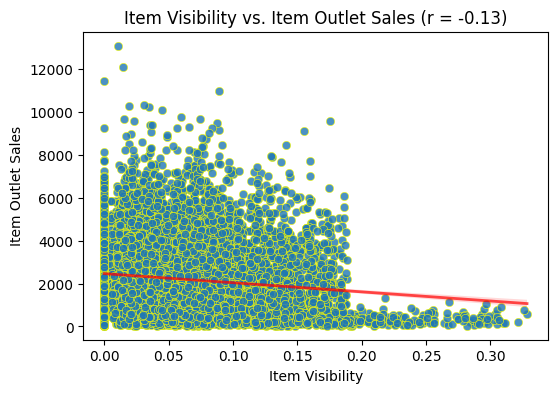

(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Item Visibility vs. Item Outlet Sales (r = -0.13)'}, xlabel='Item Visibility', ylabel='Item Outlet Sales'>)

In [58]:
num_v_target(df, 'Item_Visibility')

- Based on my business understanding I expected there might be a corrolation
- Based on the data (r only -0.13) this feature does not appear to be a predictor of the target

###Item_Type
Description: *The category to which the product belongs*

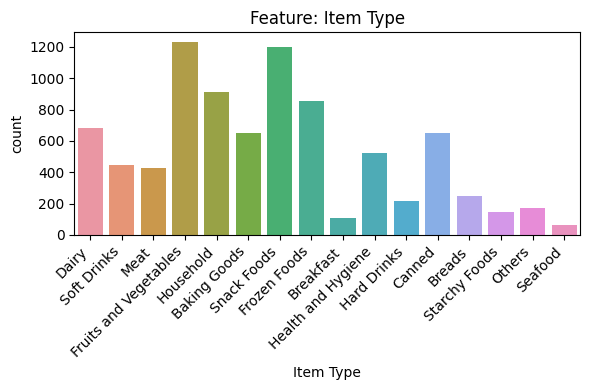

In [59]:
eda_cat(df, 'Item_Type')

In [60]:
mk_txt(df, 'Item_Type', know_before=True)

- This feature type is categorical (nominal).
- This feature is not constant or quasi-constant.
- There are 0 null values, totalling 0.0% of the feature.
- With zero null values there is need to impute.
- The cardinality is 16. This is high.
- We would know this feature before the target was determined.
**is there a reason to exclude?**


- This feature type is categorical (nominal).
- This feature is not constant or quasi-constant.
- There are 0 null values, totalling 0.0% of the feature.
- With zero null values there is need to impute.
- The cardinality is 16. This is high.
- We would know this feature before the target was determined.
- I do not have a reason to exclude this data

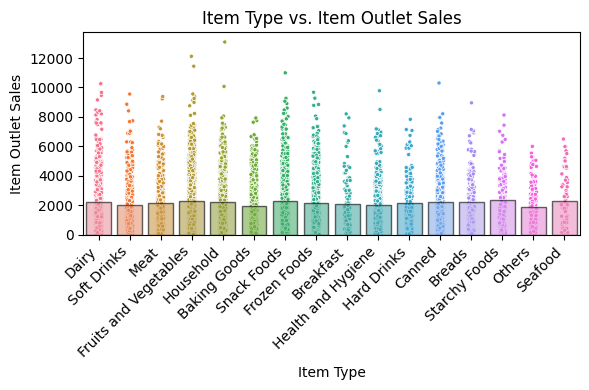

In [61]:
fig, ax = cat_v_target(df, 'Item_Type')

- Based on my business understanding I expected there might be a low corrolation
- Based on the data this feature does not appear to be a predictor of the target

###Item_MRP
Description: *Maximum Retail Price (list price) of the product*

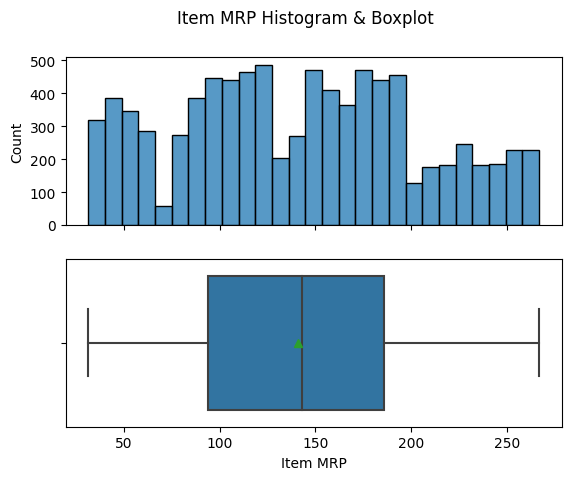

In [62]:
eda_num(df, 'Item_MRP')

In [63]:
mk_txt(df, 'Item_MRP', know_before=True)

- This feature type is numeric.
- This feature is not constant or quasi-constant.
- There are 0 null values, totalling 0.0% of the feature.
- With zero null values there is need to impute.
- The cardinality is 5938. This is high.
- We would know this feature before the target was determined.
**is there a reason to exclude?**


- This feature type is numeric.
- This feature is not constant or quasi-constant.
- There are 0 null values, totalling 0.0% of the feature.
- With zero null values there is need to impute.
- The cardinality is 5938. This is high.
- We would know this feature before the target was determined.
- I know no reason to exclude.

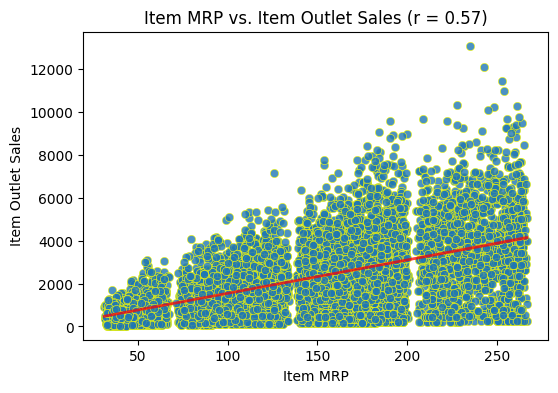

In [64]:
num_v_target(df, 'Item_MRP');

- I expected a positive trend
- Based on the data this feature appears to have a moderate correlation with the target

###Outlet_Identifier
Description: *Store ID*

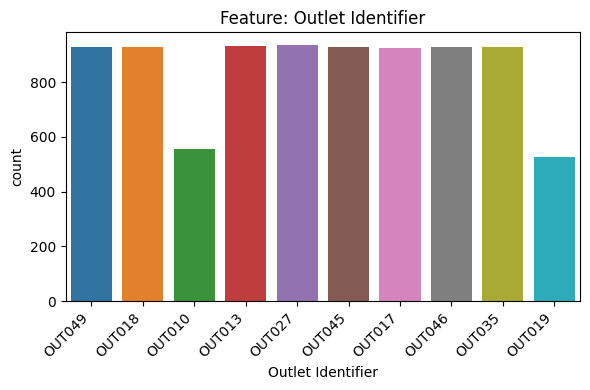

In [65]:
eda_cat(df,'Outlet_Identifier')

In [66]:
mk_txt(df,'Outlet_Identifier', know_before=True)

- This feature type is categorical (nominal).
- This feature is not constant or quasi-constant.
- There are 0 null values, totalling 0.0% of the feature.
- With zero null values there is need to impute.
- The cardinality is 10. This not high.
- We would know this feature before the target was determined.
**is there a reason to exclude?**


- This feature type is categorical (nominal).
- This feature is not constant or quasi-constant.
- There are 0 null values, totalling 0.0% of the feature.
- With zero null values there is need to impute.
- The cardinality is 10. This not high.
- We would know this feature before the target was determined.
- I would not exclude this data

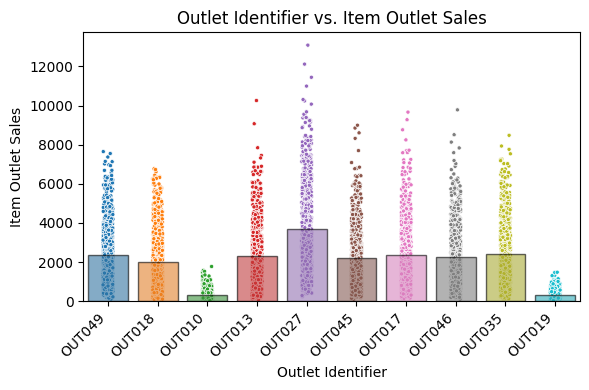

In [67]:
cat_v_target(df, 'Outlet_Identifier');

- I expected this would potentially be a predictor
- This does seem to be a predictor

###Outlet_Establishment_Year
Description: *The year in which store was established*

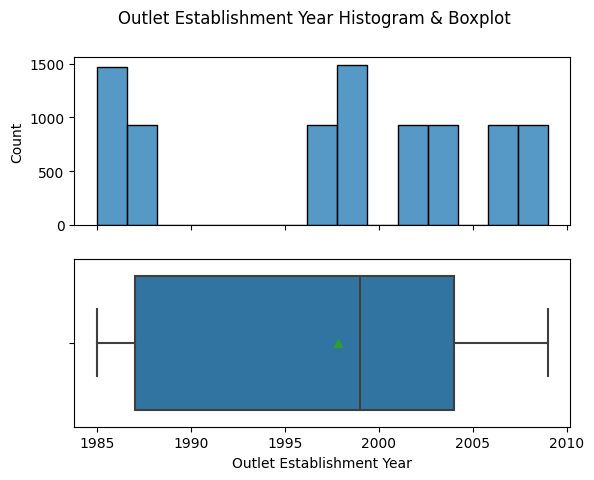

In [68]:
eda_num(df,'Outlet_Establishment_Year')

In [69]:
mk_txt(df,'Outlet_Establishment_Year', know_before=True)

- This feature type is numeric.
- This feature is not constant or quasi-constant.
- There are 0 null values, totalling 0.0% of the feature.
- With zero null values there is need to impute.
- The cardinality is 9. This not high.
- We would know this feature before the target was determined.
**is there a reason to exclude?**


- This feature type is numeric.
- This feature is not constant or quasi-constant.
- There are 0 null values, totalling 0.0% of the feature.
- With zero null values there is need to impute.
- The cardinality is 9. This not high.
- We would know this feature before the target was determined.
- I would exclude this feature as there is nothing we can really change about it

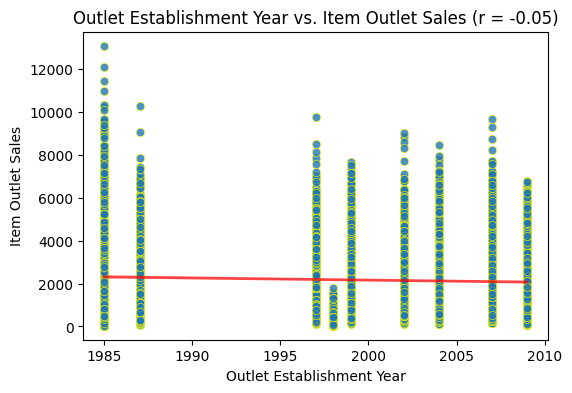

In [70]:
num_v_target(df,'Outlet_Establishment_Year');

- I did not expect this to predict
- Based on the data this feature does not appear to be a predictor of the target

###Outlet_Size
Description: *The Size of the store in terms of ground area covered*

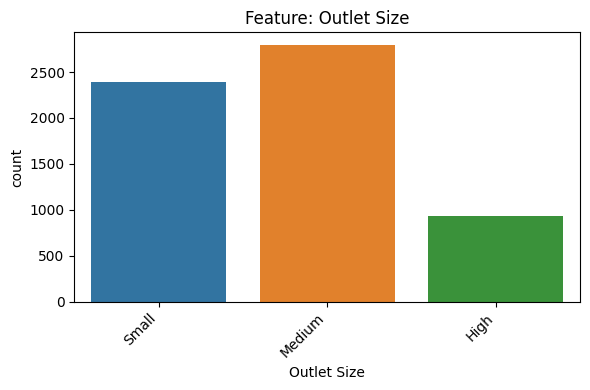

In [71]:
order = ['Small','Medium','High']
eda_cat(df,'Outlet_Size', fillna=False, order=order)

In [72]:
mk_txt(df, 'Outlet_Size', know_before=True)

- This feature type is ordinal.
- This feature is not constant or quasi-constant.
- There are 2410 null values, totalling 28.28% of the feature.
- This is ordinal data, we will ignore the null rows
- The cardinality is 4. This not high.
- We would know this feature before the target was determined.
**is there a reason to exclude?**


- This feature type is ordinal.
- This feature is not constant or quasi-constant.
- There are 2410 null values, totalling 28.28% of the feature.
- This is ordinal data, we will ignore the null rows
- The cardinality is 4. This not high.
- We would know this feature before the target was determined.
- No reason to exlcude this data

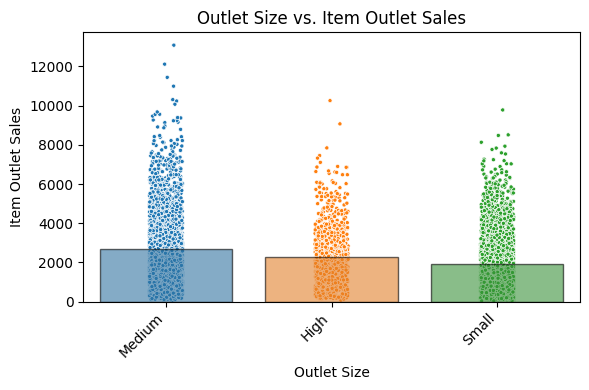

In [73]:
cat_v_target(df,'Outlet_Size', fillna=False);

- I thought this may be a predictor
- This feature does not strongly appear to be a predictor of the target

###Outlet_Location_Type
Description: *The type of area in which the store is located*

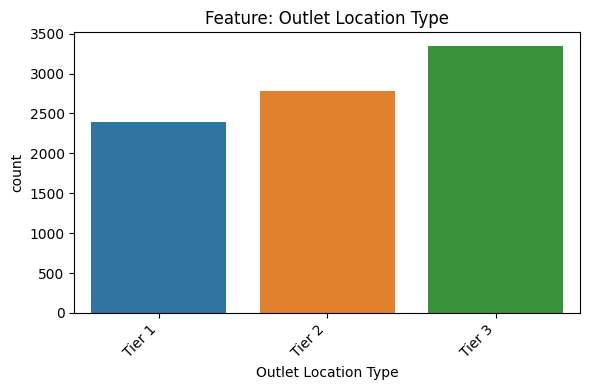

In [74]:
order = ['Tier 1','Tier 2','Tier 3']
eda_cat(df,'Outlet_Location_Type', order=order)

In [75]:
mk_txt(df,'Outlet_Location_Type',know_before=True);

- This feature type is ordinal.
- This feature is not constant or quasi-constant.
- There are 0 null values, totalling 0.0% of the feature.
- With zero null values there is need to impute.
- The cardinality is 3. This not high.
- We would know this feature before the target was determined.
**is there a reason to exclude?**


- This feature type is ordinal.
- This feature is not constant or quasi-constant.
- There are 0 null values, totalling 0.0% of the feature.
- With zero null values there is need to impute.
- The cardinality is 3. This not high.
- We would know this feature before the target was determined.
- I would not remove this data unless the client specifically was unable to build new locations and/or change the current locations

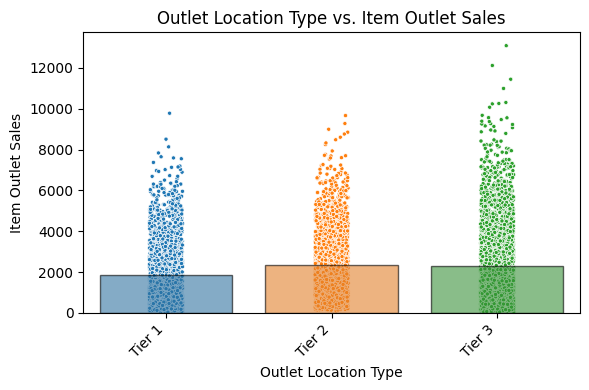

In [76]:
cat_v_target(df, 'Outlet_Location_Type', order=order);

- I expected there might be a low corrolation
- However this feature does not appear to be a predictor of the target

###Outlet_Type
Description: *Whether the outlet is a grocery store or some sort of supermarket*

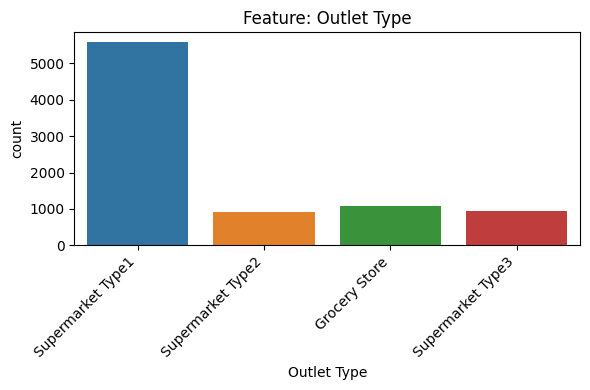

In [77]:
eda_cat(df,'Outlet_Type')

In [78]:
mk_txt(df,'Outlet_Type', know_before=True)

- This feature type is categorical (nominal).
- This feature is not constant or quasi-constant.
- There are 0 null values, totalling 0.0% of the feature.
- With zero null values there is need to impute.
- The cardinality is 4. This not high.
- We would know this feature before the target was determined.
**is there a reason to exclude?**


- This feature type is categorical (nominal).
- This feature is not constant or quasi-constant.
- There are 0 null values, totalling 0.0% of the feature.
- With zero null values there is need to impute.
- The cardinality is 4. This not high.
- We would know this feature before the target was determined.
- No reason to exclude

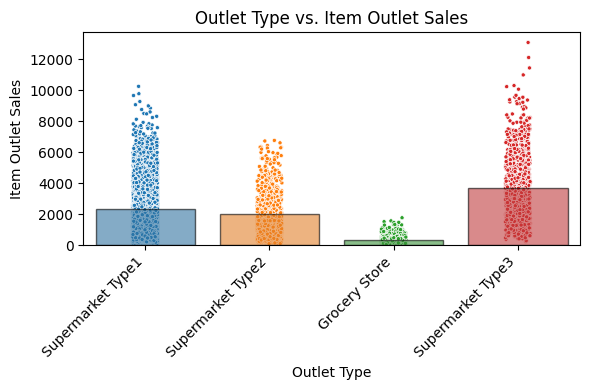

In [79]:
cat_v_target(df,'Outlet_Type');

- I expected this to be a predictor
- It does seem to predict item outlet sales

###Item_Outlet_Sales
Description: *Sales of the product in the particular store. This is the target variable to be predicted.*

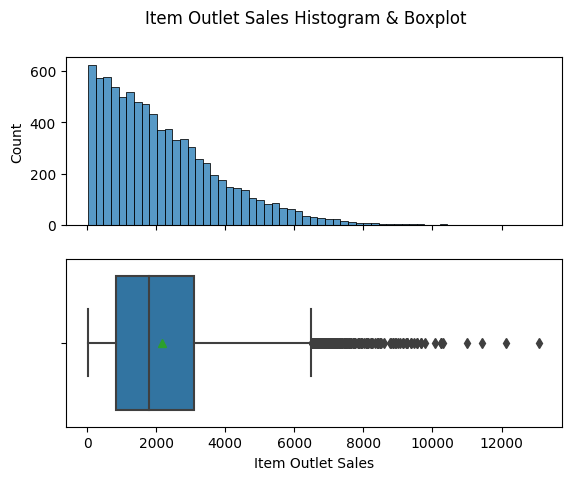

In [80]:
eda_num(df,'Item_Outlet_Sales')

In [81]:
mk_txt(df, 'Item_Outlet_Sales')

- This feature type is numeric.
- This feature is not constant or quasi-constant.
- There are 0 null values, totalling 0.0% of the feature.
- With zero null values there is need to impute.
- The cardinality is 3493. This is high.
- We would not know this feature before the target was determined.
**is there a reason to exclude?**


- This feature type is numeric.
- This feature is not constant or quasi-constant.
- There are 0 null values, totalling 0.0% of the feature.
- With zero null values there is need to impute.
- The cardinality is 3493. This is high.
- We would not know this feature before the target was determined because it **IS** the target
- As this is the target we treat it differently

In [82]:
# Skipping this plot because we know it will have 100% correlation with itself

- Obviously being the target data I expected (and found) 100% correlation
- Definately a predictor if a target can self-predict

##  Preprocessing for Machine Learning

### Reloading Data

In [83]:
# Loading a fresh version of the data
fpath = "/content/drive/MyDrive/CodingDojo/02-IntroML/Week05/Data/fresh_sales_predictions_2023.csv"
df = pd.read_csv(fpath)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [84]:
# Rows/Columns
df.shape

(8523, 12)

In [85]:
# Checking dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [95]:
df.isna().sum().sum()

3873

In [96]:
df.isna().sum()

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [91]:
# No Duplicates
df.duplicated().sum()

0

In [87]:
obj_cols = df.select_dtypes('object').columns
df[obj_cols].nunique() / len(df) * 100

Item_Identifier         18.291681
Item_Fat_Content         0.058665
Item_Type                0.187727
Outlet_Identifier        0.117330
Outlet_Size              0.035199
Outlet_Location_Type     0.035199
Outlet_Type              0.046932
dtype: float64

In [88]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [89]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace("LF","Low Fat")
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace("low fat","Low Fat")
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace("reg","Regular")
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [90]:
df.drop(columns = 'Item_Identifier', axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                7060 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Size                6113 non-null   object 
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 732.6+ KB


In [97]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [99]:
df.describe(include='object')

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,6113,8523,8523
unique,2,16,10,3,3,4
top,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,5517,1232,935,2793,3350,5577


###

### Train/Test Split

In [100]:
# Setting X and y
y = df['Item_Outlet_Sales']
X = df.drop(columns = 'Item_Outlet_Sales')

In [101]:
#Training Data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [102]:
# Checking
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6392 entries, 4776 to 7270
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                5285 non-null   float64
 1   Item_Fat_Content           6392 non-null   object 
 2   Item_Visibility            6392 non-null   float64
 3   Item_Type                  6392 non-null   object 
 4   Item_MRP                   6392 non-null   float64
 5   Outlet_Identifier          6392 non-null   object 
 6   Outlet_Establishment_Year  6392 non-null   int64  
 7   Outlet_Size                4580 non-null   object 
 8   Outlet_Location_Type       6392 non-null   object 
 9   Outlet_Type                6392 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 549.3+ KB


In [103]:
X_train['Outlet_Size'].value_counts(dropna=False)

Medium    2103
NaN       1812
Small     1788
High       689
Name: Outlet_Size, dtype: int64

In [104]:
X_train['Outlet_Location_Type'].value_counts(dropna=False)

Tier 3    2531
Tier 2    2106
Tier 1    1755
Name: Outlet_Location_Type, dtype: int64

### Preprocessor

In [105]:
# Ordinal Pipeline
ord_cols = ['Outlet_Size','Outlet_Location_Type']
# Impute
impute_common = SimpleImputer(strategy='most_frequent')
# Encode
location_order = ['Tier 1','Tier 2','Tier 3']
size_order = ['Small','Medium','High']
ord_encoder = OrdinalEncoder(categories=[location_order, size_order])
# Scale
scaler = StandardScaler()
# Pipeline
ord_pipe = make_pipeline(impute_common, ord_encoder, scaler)
ord_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('ordinalencoder',
                 OrdinalEncoder(categories=[['Tier 1', 'Tier 2', 'Tier 3'],
                                            ['Small', 'Medium', 'High']])),
                ('standardscaler', StandardScaler())])

In [112]:
# Ordinal Tuple
ord_tuple = ('ordinal', ord_pipe, ord_cols)
ord_tuple

('ordinal',
 Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                 ('ordinalencoder',
                  OrdinalEncoder(categories=[['Tier 1', 'Tier 2', 'Tier 3'],
                                             ['Small', 'Medium', 'High']])),
                 ('standardscaler', StandardScaler())]),
 ['Outlet_Size', 'Outlet_Location_Type'])

In [110]:
# Nominal Pipeline
ohe_cols = X_train.select_dtypes('object').drop(columns=ord_cols).columns
# Using value 'MISSING' for
impute_missing = SimpleImputer(strategy='constant',fill_value='MISSING')
ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
ohe_pipe = make_pipeline(impute_missing, ohe_encoder)
ohe_pipe

Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='MISSING', strategy='constant')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

In [111]:
# Nominal Tuple
ohe_tuple = ('categorical', ohe_pipe, ohe_cols)
ohe_tuple

('categorical',
 Pipeline(steps=[('simpleimputer',
                  SimpleImputer(fill_value='MISSING', strategy='constant')),
                 ('onehotencoder',
                  OneHotEncoder(handle_unknown='ignore', sparse_output=False))]),
 Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Type'], dtype='object'))

In [107]:
# Numeric Pipeline
num_cols = X_train.select_dtypes('number').columns

mean_imputer = SimpleImputer(strategy="mean")
scaler = StandardScaler()

num_pipe = make_pipeline(mean_imputer, scaler)
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [114]:
# Numeric Tuple
num_tuple = ('numeric', num_pipe, num_cols)
num_tuple

('numeric',
 Pipeline(steps=[('simpleimputer', SimpleImputer()),
                 ('standardscaler', StandardScaler())]),
 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
        'Outlet_Establishment_Year'],
       dtype='object'))

In [115]:
# Instantiate with verbose_feature_names_out=False
preprocessor = ColumnTransformer([num_tuple, ord_tuple, ohe_tuple],
                                    verbose_feature_names_out=False)